# Welcome to Full Stack Machine Learning's Week 1 Project!

Welcome to our project on sentiment analysis using a [Women's Ecommerce Clothing Reviews Dataset from Kaggle](https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews)! As a Data Scientist, you'll often be tasked with building predictive models that help businesses understand their customers' needs and preferences. In this project, our main goal is to understand the importance of creating a baseline model as a starting point for further improvements.

To achieve this goal, we'll be using a dataset containing reviews written by customers about women's clothing sold online. The dataset offers a great environment to parse out the text through its multiple dimensions, and because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with "retailer".

As part of the project, we'll start by exploring the dataset, performing some basic cleaning, and establishing a baseline model using a simple algorithm. We'll then discuss the importance of this baseline model and how it can be used as a reference point for future improvements.

Optionally, we'll also be creating a simple model that performs better than the baseline model. This will give us a better understanding of how machine learning models work and the benefits of using more complex algorithms.

We're excited to embark on this project together and look forward to exploring the world of sentiment analysis with you!

### Using GitHub
To complete the assignment:
1. Fill in the TODO sections of this notebook.
2. Push the results to your `full-stack-ml-metaflow-corise-week-1` repository.
3. Create a link to the repository in Corise.

## Task 1. EDA

Exploratory Data Analysis (EDA) is a critical step in the data science pipeline as it allows us to gain insights and identify patterns within the data. In this section, we will be performing EDA on the Women's Clothing E-Commerce dataset, which contains reviews written by customers. Through this process, we will be looking out for trends, anomalies, and outliers that can help us better understand the data and inform our decision-making in subsequent stages of the project. By performing EDA, we will be able to identify potential issues with the dataset and make necessary corrections before proceeding to the model building phase.

Suggestion: Spend 1-2 hours on this section.

### Import Dependencies
You can change these if you wish! 
These packages are already installed in the `full-stack-metaflow-corise` environment. 
If you are feeling adventurous, you can install other packages you want in the conda environment too, or even make your own environment from scratch and include with your submission! 

In [28]:
from collections import Counter
import pandas as pd
import numpy as np 
from termcolor import colored
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk

### Configure plots
This part is optional styling your plots and cards.

In [29]:
YELLOW = '#FFBC00'
GREEN = '#37795D'
PURPLE = '#5460C0'
BACKGROUND = '#F4EBE6'
colors = [GREEN, PURPLE]
custom_params = {
    'axes.spines.right': False, 'axes.spines.top': False,
    'axes.facecolor':BACKGROUND, 'figure.facecolor': BACKGROUND, 
    'figure.figsize':(8, 8)
}
sns_palette = sns.color_palette(colors, len(colors))
sns.set_theme(style='ticks', rc=custom_params)

### Load the data 

In [30]:
import glob 
glob.glob('../*')
glob.glob('../data/*')

['../data/agaricus.txt.train',
 '../data/Womens Clothing E-Commerce Reviews.csv',
 '../data/agaricus.txt.test',
 '../data/titanic.csv']

In [31]:
# TODO: Load the dataset, ensure to use index_col=0 when reading the CSV file. 
# Hints
    # Look in the ../../data directory of this worksapce. 
    # If you use pandas think about the index_col arg 🧐 
df = pd.read_csv('../data/Womens Clothing E-Commerce Reviews.csv')

# light data cleaning
df.columns = ["_".join(name.lower().strip().split()) for name in df.columns]
df['review_text'] = df['review_text'].astype('str')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   unnamed:_0               23486 non-null  int64 
 1   clothing_id              23486 non-null  int64 
 2   age                      23486 non-null  int64 
 3   title                    19676 non-null  object
 4   review_text              23486 non-null  object
 5   rating                   23486 non-null  int64 
 6   recommended_ind          23486 non-null  int64 
 7   positive_feedback_count  23486 non-null  int64 
 8   division_name            23472 non-null  object
 9   department_name          23472 non-null  object
 10  class_name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [33]:
df.describe()

,unnamed:_0,clothing_id,age,rating,recommended_ind,positive_feedback_count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


### Plot the distribution of [1, 5] ratings

We will be using the `rating` to create a label on this dataset. We can see that the mean rating is above 4, pretty happy customers!

Let's try to visualise the distrbution of the label. 

In [34]:
df['rating'].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: rating, dtype: int64

<BarContainer object of 5 artists>

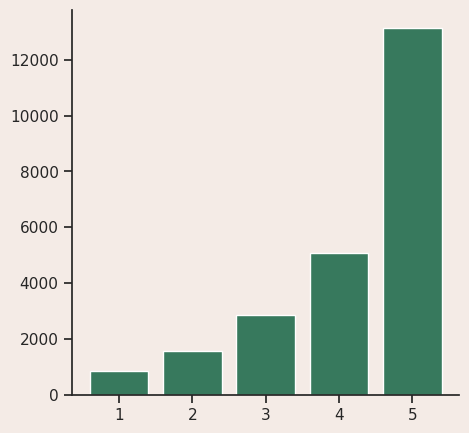

In [35]:
# TODO: Derive the rating_distribution and plot it
rating_distribution = df['rating'].value_counts()
fig, ax = plt.subplots(1,1,figsize=(5,5))
# You can swap the color used with the defined constants at the top of the notebook
ax.bar(x=rating_distribution.index, height=rating_distribution.values, color=GREEN)

In [36]:
positive = 4


In [37]:
def labeling_function(row):
    """
    A function to derive labels from the user's review data.
    This could use many variables, or just one. 
    In supervised learning scenarios, this is a very important part of determining what the machine learns!
   
    A subset of variables in the e-commerce fashion review dataset to consider for labels you could use in ML tasks include:
        # rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
        # recommended_ind: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
        # positive_feedback_count: Positive Integer documenting the number of other customers who found this review positive.

    In this case, we are doing sentiment analysis. 
    To keep things simple, we use the rating only, and return a binary positive or negative sentiment score based on an arbitrarty cutoff. 
    """
    # TODO: Add your logic for the labelling function here
    label = np.nan
    if row['rating'] >= 4:
        label = 1
    elif row['rating'] < 4:
        label = 0

    # It is up to you on what value to choose as the cut off point for the postive class
    # A good value to start would be 4
    # This function should return either a 0 or 1 depending on the rating of a particular row
    return label

# final features and labels
_has_review_df = df[df['review_text'] != 'nan']
reviews = _has_review_df['review_text']
labels = _has_review_df.apply(labeling_function, axis=1)
has_review_df = pd.DataFrame({'label': labels, **_has_review_df})
del _has_review_df

# a few checks
assert labels.shape == reviews.shape, "Labels and reviews should be equal shape vectors!"
assert not sum([1 if r == 'nan' else 0 for r in reviews]) > 0, "There are `nan` values in the feature set!"

In [56]:
has_review_df[['review_text','label']]

,review_text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
23481,I was very happy to snag this dress at such a ...,1
23482,"It reminds me of maternity clothes. soft, stre...",0
23483,"This fit well, but the top was very see throug...",0
23484,I bought this dress for a wedding i have this ...,0


#### What percentage of points does your algorithm label with positive sentiment?

In [38]:
pct_positive_sentiment = labels.sum() / labels.shape[0]
print(f"{round(100*pct_positive_sentiment,3)}% of the labels have positive sentiment.")

77.064% of the labels have positive sentiment.


### Let us try to visualise the data that we just labeled depending on the rating. 

In a real world project, iterating at this point is crucial. You need to look through the way your data is labeled, and ensure it is aligned with your intuitive understanding and objectives of the algorithm. There are also automated tools to aid your label cleaning operations, such as [Cleanlab](https://github.com/cleanlab/cleanlab).  

In [39]:
# params
positive_color = 'green'
negative_color = 'red'
N = 10

# fetch subset of data
idxs = np.random.choice(reviews.index, 10, replace=False)
_labels_subset = labels[idxs]
_reviews_subset = reviews[idxs]

# print each sample and color the text by sentiment
for label, review in zip(_labels_subset, _reviews_subset):
    color = negative_color if label == 0 else positive_color
    print(colored(review, color), end='\n\n')

# in a real world project, iterating at this point is crucial.
# you need to look through the way your data is labeled, and ensure it is aligned with your intuitive understanding and objectives of the algorithm.
# there are also automated tools to aid your label cleaning operations, such as: https://github.com/cleanlab/cleanlab

It is seldom that i write a review about a tee, but after receiving the jessa tee in the mail today, i just felt compelled to do so! the deal is, this tee is pricey for sure, but in my opinion, it is worth it! as another reviewer said, the cotton fabric is hefty; in fact, it could also be called a "lightweight sweater." everything about this tee is perfect and classic: the elbow sleeves, the nice neckline, and the semi-boxy, semi-cropped fit. it will go with everything from jeans, to nice slacks

I am not a fray fan but this dress has a modern vintage look, and it looks tailored. check out the ruffle sleeves, surprising detail. size regular small falls right above my knees, perfect at the chest (i'm 5'2", 34b, 26 waist, 36 hips), but the sleeves are 2 inches pass my wrist. the ruffle sleeves are too pretty to be rolled up, so i got the petite s, sleeves at perfect length, torso fits better but length is an inch shorter (thank you, cloth and stone for finally making petite sizes).

I or

### What do you think about the text and their corresponding labels? 
- Do you think the labels fit the text? 
- If not what do you think we can do to fix it?

### Filtering Stop Words
In this part we will be filtering the stop words from the reviews. We remove stopwords in NLP datasets because there are words that do not carry much meaning on their own, and their presence can add noise to the analysis. These words are common and frequently occurring words such as "a", "an", "the", "of", and "and". 

Removing stopwords can improve the accuracy and efficiency of natural language processing tasks, such as sentiment analysis or topic modeling, by reducing the dimensionality of the data and increasing the signal-to-noise ratio. By removing these uninformative words, the resulting dataset may contain more meaningful information that can be used for analysis.

In [40]:
nltk.download('stopwords')
stopwords = list(nltk.corpus.stopwords.words("english"))
non_stopwords = []
for review in reviews: 
    for word in review.split():
        word = word.translate(str.maketrans('', '', string.punctuation))
        if word == '':
            continue
        if not word.lower() in stopwords:
            non_stopwords.append(word)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/workspace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Find the K most common words

In [41]:
K = 25
words, counts = zip(*Counter(non_stopwords).most_common(K))

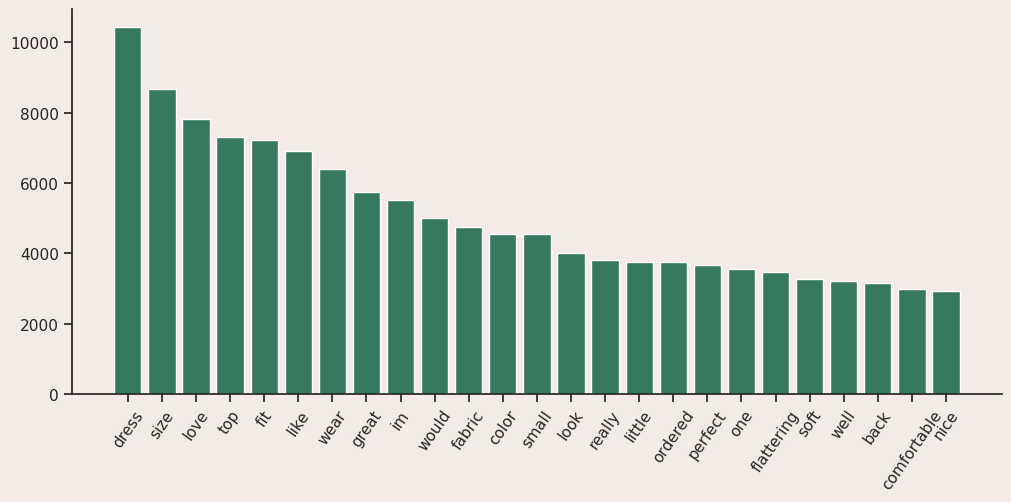

In [42]:
fig,ax = plt.subplots(1,1,figsize=(12,5))
plt.xticks(rotation = 55)
ax.bar(x=words, height=counts, color=GREEN);

### What do the other features in the data look like?

In [43]:
sns.pairplot(data=has_review_df, hue='label', corner=True, palette=sns_palette);

Error in callback <function flush_figures at 0x7fd60d871ee0> (for post_execute):


KeyboardInterrupt: 

## Task 2: Scoping Out a Machine Learning Project

Welcome to the Project Manager task for the sentiment analysis classifier project. As a Data Scientist, you know that a successful project requires not only technical skills but also effective project management. In this task, you will take on the role of a Data Scientist tasked with leading the development of a sentiment analysis classifier. You will be responsible for planning and executing the project, ensuring that it aligns with business goals, stays within scope, and delivers value to stakeholders.

To do this, you will create a one-page document that outlines the business value of the project, its scope, how to measure and monitor success, and when to quit. This task is designed to challenge you to think holistically about the project, and to consider not only the technical details but also the broader context in which the project is situated. Good luck!

Suggestion: Spend 1-2 hours on this section.

Fill in the section below with your answers!

### 1. The business value

### 2. The scope

### 3. How to measure success

### 4. How to monitor success

### Great job completing Task 2! 

Why do you think it is important to create a one-page document prior to beginning work on the project?

## Task 3: Baseline Machine Learning Flow

A basic baseline in a machine learning model is the simplest possible model that can be used to make predictions on the dataset. The basic baseline can be as simple as predicting the most frequent class for a classification problem or the mean value of the target variable for a regression problem. The purpose of establishing a baseline is to provide a benchmark for evaluating the performance of more complex models. A model that cannot outperform the basic baseline is considered to be useless and should not be used in practice.

Here you will need to convert the code from above that was used to perform preprocessing and EDA on the dataset and create a Flow to run in order to train a baseline model. 

**NOTE:** It is important to realise that this is being run as a separate file and therefore re-using functions from above will not work. 

Suggestion: Spend 2-4 hours on this section. Rememeber that the more organized your earlier work is, the easier it is to write flows!

In [54]:
df

,unnamed:_0,clothing_id,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split


df = has_review_df[['review_text','label']]

X = df[['review_text']]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

vectorizer = TfidfVectorizer()
preprocessing_pipeline = make_column_transformer((vectorizer, 'review_text'), remainder='drop')

model = DecisionTreeClassifier()
pipeline = make_pipeline(preprocessing_pipeline, model)

pipeline.fit(X_train, y_train)

pred = pipeline.predict(X_test)

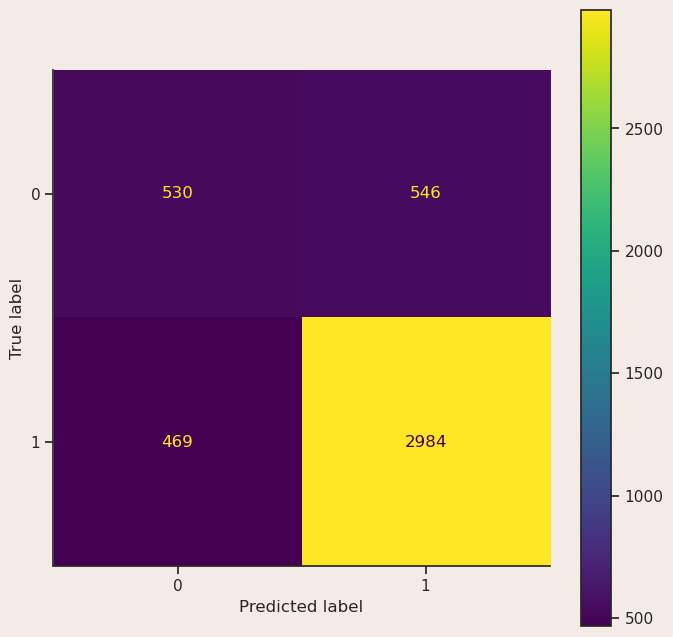

In [96]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred,)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [107]:
%%writefile baseline_flow.py
from metaflow import FlowSpec, step, Flow, current, Parameter, IncludeFile, card, current
from metaflow.cards import Table, Markdown, Artifact, Image
import numpy as np

def labeling_function(row):
    label = np.nan
    if row['rating'] >= 4:
        label = 1
    elif row['rating'] < 4:
        label = 0
    return label

class BaselineNLPFlow(FlowSpec):

    # We can define input parameters to a Flow using Parameters
    # More info can be found here https://docs.metaflow.org/metaflow/basics#how-to-define-parameters-for-flows
    split_size = Parameter('split-sz', default=0.2)
    # In order to use a file as an input parameter for a particular Flow we can use IncludeFile
    # More information can be found here https://docs.metaflow.org/api/flowspec#includefile
    data = IncludeFile('data', default='../data/Womens Clothing E-Commerce Reviews.csv')

    @step
    def start(self):
        # Start the Flow
        import io 
        import pandas as pd
        from sklearn.model_selection import train_test_split
        
        # load dataset packaged with the flow.
        df = pd.read_csv(io.StringIO(self.data))

        # filter down to reviews and labels 
        df.columns = ["_".join(name.lower().strip().split()) for name in df.columns]
        df['review_text'] = df['review_text'].astype('str')
        _has_review_df = df[df['review_text'] != 'nan']
        reviews = _has_review_df['review_text']
        labels = _has_review_df.apply(labeling_function, axis=1)
        self.df = pd.DataFrame({'label': labels, **_has_review_df})

        df = pd.DataFrame({'review': reviews, 'label': labels})
        X = df[['review']]
        y = df['label']
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=self.split_size)
        print(f'num of rows in train set: {self.X_train.shape[0]}')
        print(f'num of rows in validation set: {self.X_test.shape[0]}')
        # ----> next 
        self.next(self.baseline)

    @step
    def baseline(self):
        "Compute Baseline Model"
        from sklearn.tree import DecisionTreeClassifier
        from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
        from sklearn.compose import make_column_transformer
        from sklearn.pipeline import make_pipeline
        from sklearn.metrics import accuracy_score, roc_auc_score

        # define pipeline
        #vectorizer = TfidfVectorizer()
        vectorizer = CountVectorizer()
        preprocessing_pipeline = make_column_transformer((vectorizer, 'review'), remainder='drop')
        model = DecisionTreeClassifier()
        self.pipeline = make_pipeline(preprocessing_pipeline, model) 
        
        # fit pipeline
        self.pipeline.fit(self.X_train, self.y_train)

        # evaluate pipeline
        self.y_pred = self.pipeline.predict(self.X_test)
        self.base_acc = accuracy_score(self.y_test, self.y_pred)
        self.base_rocauc = roc_auc_score(self.y_test, self.y_pred)
        # ----> next 
        self.next(self.end)

    @card(type='corise')
    @step
    def end(self):
        try:
            from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

            msg = 'Baseline Accuracy: {}\nBaseline AUC: {}'
            print(msg.format(round(self.base_acc,3), round(self.base_rocauc,3)))

            current.card.append(Markdown("# Womens Clothing Review Results"))
            current.card.append(Markdown("## Overall Accuracy"))
            current.card.append(Artifact(self.base_acc))

            self.cm = confusion_matrix(self.y_test, self.y_pred)
            disp = ConfusionMatrixDisplay(confusion_matrix=self.cm)
            disp.plot()
            current.card.append(Image.from_matplotlib(disp.figure_, label='confusion_matrix'))
            
        except Exception as ex:
            print(ex)

if __name__ == '__main__':
    BaselineNLPFlow()

Overwriting baseline_flow.py


In [108]:
! python baseline_flow.py run

Metaflow 2.8.3.1+ob(v1) executing BaselineNLPFlow for user:sandbox
Validating your flow...
    The graph looks good!
Running pylint...
    Pylint is happy!
Including file ../data/Womens Clothing E-Commerce Reviews.csv of size 8MB 
2023-04-30 22:06:21.203 Workflow starting (run-id 16), see it in the UI at https://ui-pw-803931809.outerbounds.dev/BaselineNLPFlow/16
2023-04-30 22:06:21.384 [16/start/60 (pid 7030)] Task is starting.
2023-04-30 22:06:24.506 [16/start/60 (pid 7030)] num of rows in train set: 18112
2023-04-30 22:06:27.186 [16/start/60 (pid 7030)] num of rows in validation set: 4529
2023-04-30 22:06:27.412 [16/start/60 (pid 7030)] Task finished successfully.
2023-04-30 22:06:27.712 [16/baseline/61 (pid 7141)] Task is starting.
2023-04-30 22:06:38.703 [16/baseline/61 (pid 7141)] Task finished successfully.
2023-04-30 22:06:39.060 [16/end/62 (pid 7240)] Task is starting.
2023-04-30 22:06:40.895 [16/end/62 (pid 7240)] Baseline Accuracy: 0.771
2023-04-30 22:06:46.071 [16/end/62 (pi

### Great job completing Task 3!

The project for Week 1 is completed but you are free to try out Task 4 below if you have the time to do so! Remember that completing Task 4 is not a requirement and completely optional. So far we have got you already building basic Machine Learning Pipelines uing Metaflow, what do you think about it so far?

## Task 4: A Good First Machine Learning Model Flow(OPTIONAL)
### Great now that we have established a baseline score for our dataset, let's try to create an actual model for this. 

You are free to experiment and try to get a very high score in terms of model metrics such as Accuracy/AUC but bear in-mind that usually in the real-world we have to prioritise quick iterations in order to gather quick feedback. Its important to also think about how you will be serving the model as well, more complex DNN will require GPU's in order to perform inference whereas simpler models will work fine on CPU's. 

1. What model do you think would do a good enough job to get the ball rolling?
2. Try creating a `GoodFirstModelNLPFlow` Flow. 
3. Can you verify that the `GoodFirstModelNLPFlow` is indeed better than the `BaselineNLPFlow`? Metaflow has a Client API which you can use to assert that this more complex model is indeed better. You can refer to the documentation [here](https://docs.metaflow.org/metaflow/client). 
4. Did your `GoodFirstModelNLPFlow` do better than the `BaselineNLPFlow`? If yes, why do you think so? If not, what do you think was the reason?
5. Why do you think it is important to prioritise quick iterations when working on an ML project?